<a href="https://colab.research.google.com/github/systembootcamp/Projeto-criado-primefaces/blob/master/Celsius_To_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
temperature_df = pd.read_csv('/content/3.2 Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True)


In [9]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [10]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [11]:
temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [12]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [13]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


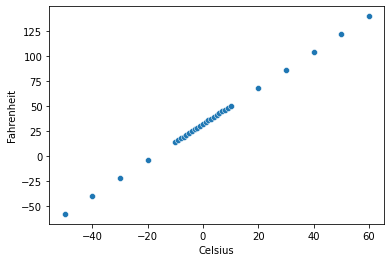

In [14]:
sns.scatterplot(temperature_df['Celsius'], temperature_df['Fahrenheit']);

In [15]:
x_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

In [16]:
x_train.shape

(30,)

In [17]:
y_train.shape

(30,)

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [20]:
epochs_hist = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 6678.0684
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 6337.0688
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 6006.5757
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 5686.7559
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 5377.7686
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 5079.7480
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 4792.8062
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 4517.0386
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 4252.5137
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 3999.2771
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 3757.3469
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 3526.7170
Epoch 13/500
1/1 [=======

In [21]:
epochs_hist.history.keys()

dict_keys(['loss'])

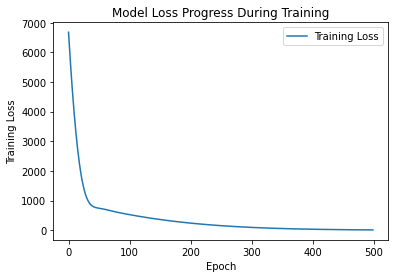

In [22]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);


In [23]:
model.get_weights()

[array([[1.8121352]], dtype=float32), array([29.0219], dtype=float32)]

In [24]:
temp_c = 10
temp_f = model.predict([temp_c])
temp_f

array([[47.143253]], dtype=float32)

In [25]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

50.0